In [97]:
import importlib
from typing import List

import utils.file_utils as fu
importlib.reload(fu)

df = fu.load_dataset(header=["Speaker", "Year", "Topic"])
df.head()


Loaded 3492 records from C:\data\around-work\academinc-work\2025\css\css.csv
Columns: Index(['Type', 'Speaker', 'Topic', 'Year'], dtype='object')
Adding column "combined"


,Speaker,Year,Topic,combined
0,Michael Macy,2015,Opportunities and challenges for computational...,Speaker: Michael Macy; Year: 2015; Topic: Oppo...
1,Jure Leskovec,2015,Structure and dynamics of information propagation,Speaker: Jure Leskovec; Year: 2015; Topic: Str...
2,"Omar Guerrero, Eduardo Lopez, Robert Axtell",2015,Labor flows and unemployment mediated by networks,"Speaker: Omar Guerrero, Eduardo Lopez, Robert ..."
3,Duncan Watts,2015,An experimental study of collective self-organ...,Speaker: Duncan Watts; Year: 2015; Topic: An e...
4,Matthew Jackson,2015,Multiplexing and the interaction between borro...,Speaker: Matthew Jackson; Year: 2015; Topic: M...


In [98]:
df['Speakers'] = df['Speaker']
df_exploded = df.assign(Speaker=df["Speaker"].str.split(", ")).explode("Speaker")

df_exploded.head()

,Speaker,Year,Topic,combined,Speakers
0,Michael Macy,2015,Opportunities and challenges for computational...,Speaker: Michael Macy; Year: 2015; Topic: Oppo...,Michael Macy
1,Jure Leskovec,2015,Structure and dynamics of information propagation,Speaker: Jure Leskovec; Year: 2015; Topic: Str...,Jure Leskovec
2,Omar Guerrero,2015,Labor flows and unemployment mediated by networks,"Speaker: Omar Guerrero, Eduardo Lopez, Robert ...","Omar Guerrero, Eduardo Lopez, Robert Axtell"
2,Eduardo Lopez,2015,Labor flows and unemployment mediated by networks,"Speaker: Omar Guerrero, Eduardo Lopez, Robert ...","Omar Guerrero, Eduardo Lopez, Robert Axtell"
2,Robert Axtell,2015,Labor flows and unemployment mediated by networks,"Speaker: Omar Guerrero, Eduardo Lopez, Robert ...","Omar Guerrero, Eduardo Lopez, Robert Axtell"


In [65]:
speakers_per_year = df_exploded.groupby("Year")["Speakers"].nunique().sort_index()
speaker_per_year = df_exploded.groupby("Year")["Speaker"].nunique().sort_index()
publication_count_per_speakers = df.groupby("Speakers")["Year"].count().reset_index(name="Publication Count").sort_values(by="Publication Count", ascending=False)
publication_count_per_speaker = df_exploded.groupby("Speaker")["Year"].count().reset_index(name="Publication Count").sort_values(by="Publication Count", ascending=False)
first_last_publication_by_speakers = df.groupby("Speakers")["Year"].agg(["min", "max", "count"]).sort_values(by=["min", "max", "count"])
first_last_publication_by_speaker = df_exploded.groupby("Speaker")["Year"].agg(["min", "max", "count"]).sort_values(by=["min", "max", "count"])
publications_per_year = df["Year"].value_counts().sort_index()


speakers = df['Speaker'].nunique()
print(f'Number of unique speakers:\n{speakers}')
print(f'Number of speakers (combined) per year:\n{speakers_per_year}')
print(f'Number of speakers per year:\n{speaker_per_year}')
print(f'Number of publications per speakers (combined):\n{publication_count_per_speakers}')
print(f'Number of publications per speaker:\n{publication_count_per_speaker}')
print(f'First and last publication per speakers (combined):\n{first_last_publication_by_speakers}')
print(f'First and last publication per speaker:\n{first_last_publication_by_speaker}')
print(f'Publications per year:\n{publications_per_year}')


Number of unique speakers:
3322
Number of speakers (combined) per year:
Year
2015    305
2016    233
2017    211
2018    235
2019    372
2020    428
2021    274
2022    153
2023    603
2024    615
Name: Speakers, dtype: int64
Number of speakers per year:
Year
2015     795
2016     568
2017     542
2018     530
2019     858
2020     988
2021     703
2022     416
2023    1482
2024    1358
Name: Speaker, dtype: int64
Number of publications per speakers (combined):
                                               Speakers  Publication Count
1564                                       Ivan Smirnov                  6
2781  Santa Agreste, Pasquale De Meo, Emilio Ferrara...                  4
495   Asael H Sorensen, Asmeret Naugle, Casey Doyle,...                  4
2968                                       Taha Yasseri                  4
2928                                  Subhayan Mukerjee                  3
...                                                 ...                ...
1125     

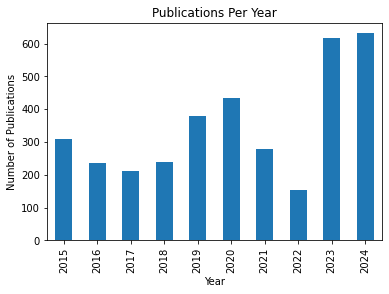

In [66]:
import matplotlib.pyplot as plt

publications_per_year.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.title("Publications Per Year")
plt.show()

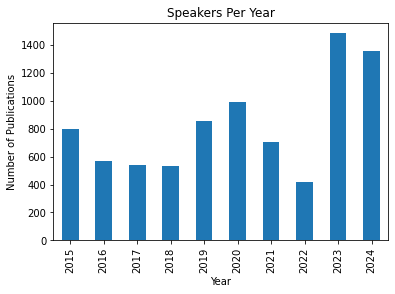

In [67]:
speaker_per_year.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.title("Speakers Per Year")
plt.show()

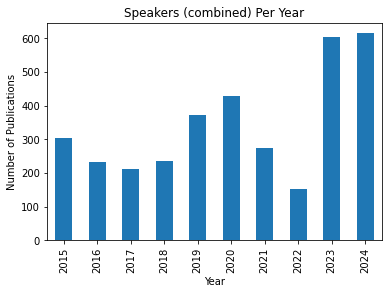

In [68]:
speakers_per_year.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.title("Speakers (combined) Per Year")
plt.show()


In [69]:
from collections import defaultdict

speakers_per_year_dict = defaultdict(lambda: defaultdict(int))
for year, speaker in df_exploded[["Year", "Speaker"]].values:
    speakers_per_year_dict[year][speaker] += 1
speakers_per_year_dict

defaultdict(<function __main__.<lambda>()>,
            {2015: defaultdict(int,
                         {'Michael Macy': 3,
                          'Jure Leskovec': 1,
                          'Omar Guerrero': 2,
                          'Eduardo Lopez': 3,
                          'Robert Axtell': 1,
                          'Duncan Watts': 1,
                          'Matthew Jackson': 1,
                          'Telecom Italy (SKIL Lab & Future Center)': 1,
                          'Fondazione Bruno Kessler (I3 & Mobs)': 1,
                          'MIT-Media Lab (Human Dynamics)': 1,
                          'Telefonica R & D (User': 1,
                          'Media Intelligence)': 1,
                          'Trento-RISE (smart CROWDS)': 1,
                          'Janos Kertesz': 5,
                          'Balazs Lengyel': 1,
                          'Bence Sagvari': 1,
                          'Janos Torok': 2,
                          'Zhongyuan Ruan': 

year=2015, y=[656, 93, 29, 12, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
year=2016, y=[456, 82, 19, 7, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
year=2017, y=[455, 67, 11, 4, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
year=2018, y=[422, 79, 16, 8, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
year=2019, y=[729, 88, 26, 11, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
year=2020, y=[778, 132, 42, 14, 12, 1, 3, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1]
year=2021, y=[573, 92, 25, 6, 5, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
year=2022, y=[348, 52, 11, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
year=2023, y=[1167, 191, 60, 34, 16, 7, 3, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0]
year=2024, y=[1064, 175, 58, 30, 14, 7, 1, 6, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
1167


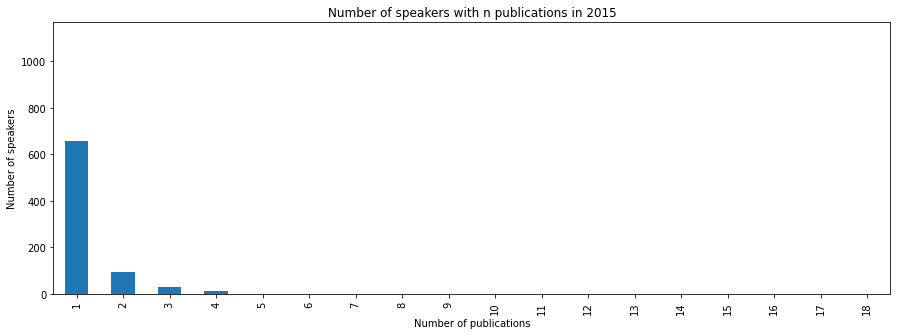

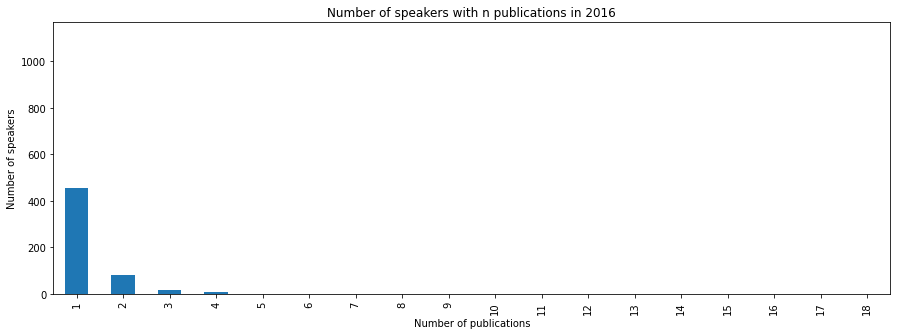

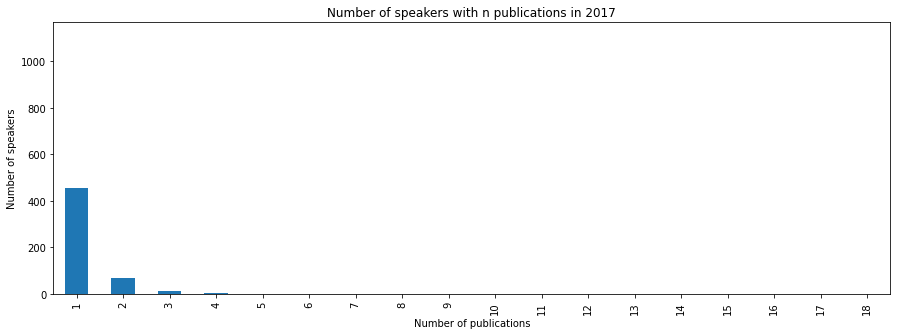

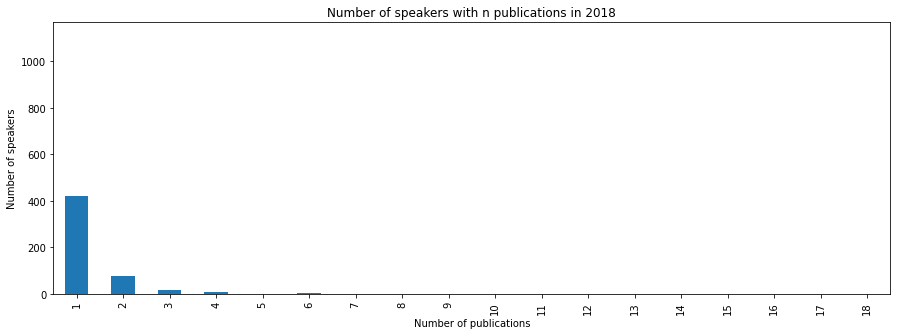

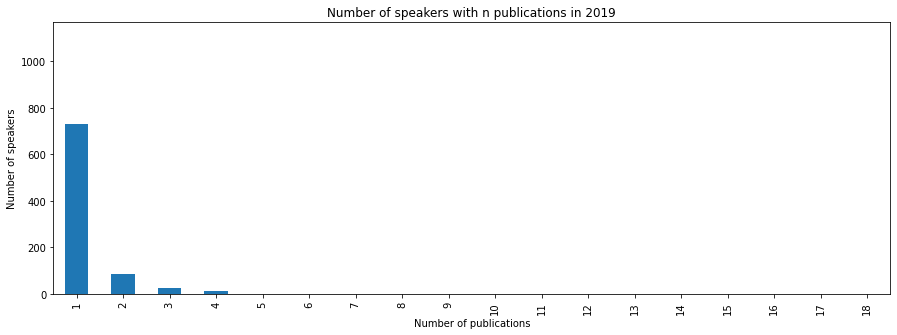

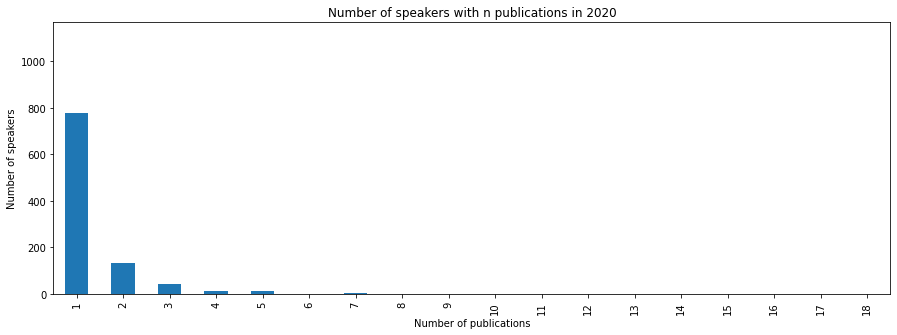

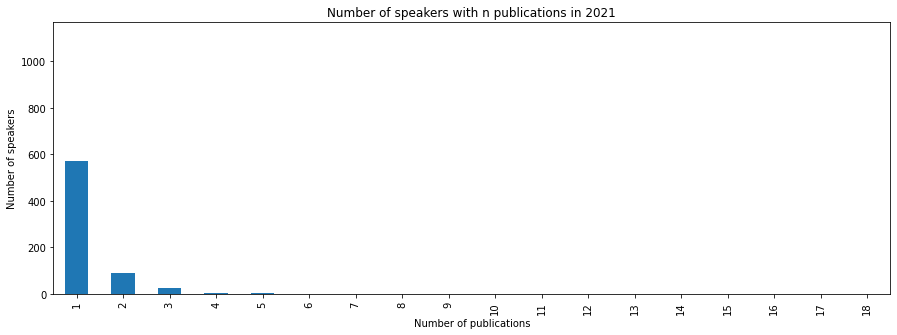

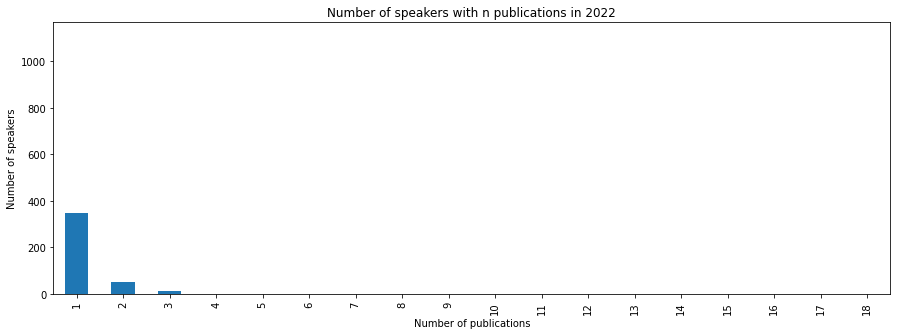

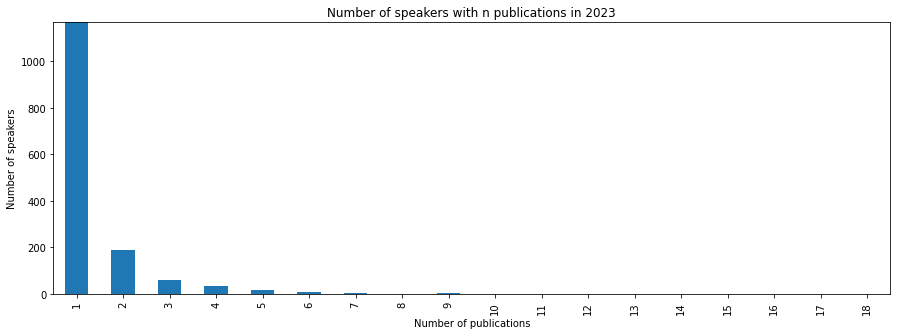

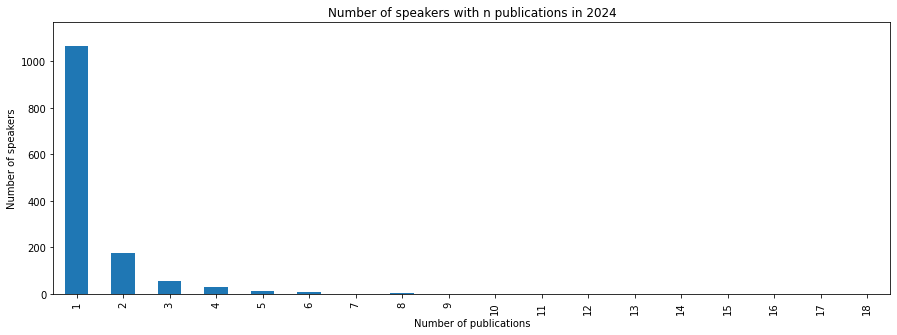

In [70]:
from pandas import Series

max_publications = max(max(s.values()) for s in speakers_per_year_dict.values())
max_speakers = 0
y_s = []

count_dict_per_year = defaultdict(lambda: defaultdict(list))
for year, speakers_data in sorted(speakers_per_year_dict.items()):
    # print(f'Year: {year}')
    # print(f'Number of speakers: {len(speakers_data)}')
    for speaker, count in speakers_data.items():
        count_dict_per_year[year][count].append(speaker)
    y = [len(count_dict_per_year[year].get(n+1, [])) for n in range(max_publications)]
    y_s.append(y)
    print(f'{year=}, {y=}')
    max_y = max(y)
    if max_y > max_speakers:
        max_speakers = max_y
    # for count, speakers in sorted(count_dict.items(), key=lambda x: x[0], reverse=True):
        # print(f'  Number of speakers with {count} publications: {len(speakers)}')
        # print(f'  Speakers with {count} publications: {", ".join(speakers)}')
print(max_speakers)
for no, [year, count_dict] in enumerate(sorted(count_dict_per_year.items())):
    # print({c: len(s) for c, s in count_dict.items()})


    ts = Series(y_s[no], index=list(range(1, max_publications+1)))
    ts.plot(kind='bar', figsize=(15,5), title=f'Number of speakers with n publications in {year}', xlabel='Number of publications', ylabel='Number of speakers', ylim=(0, max_speakers))
    plt.show()

In [71]:
'''
'''

'\n'

2015


100%|██████████| 767/767 [00:00<00:00, 300404.44it/s]


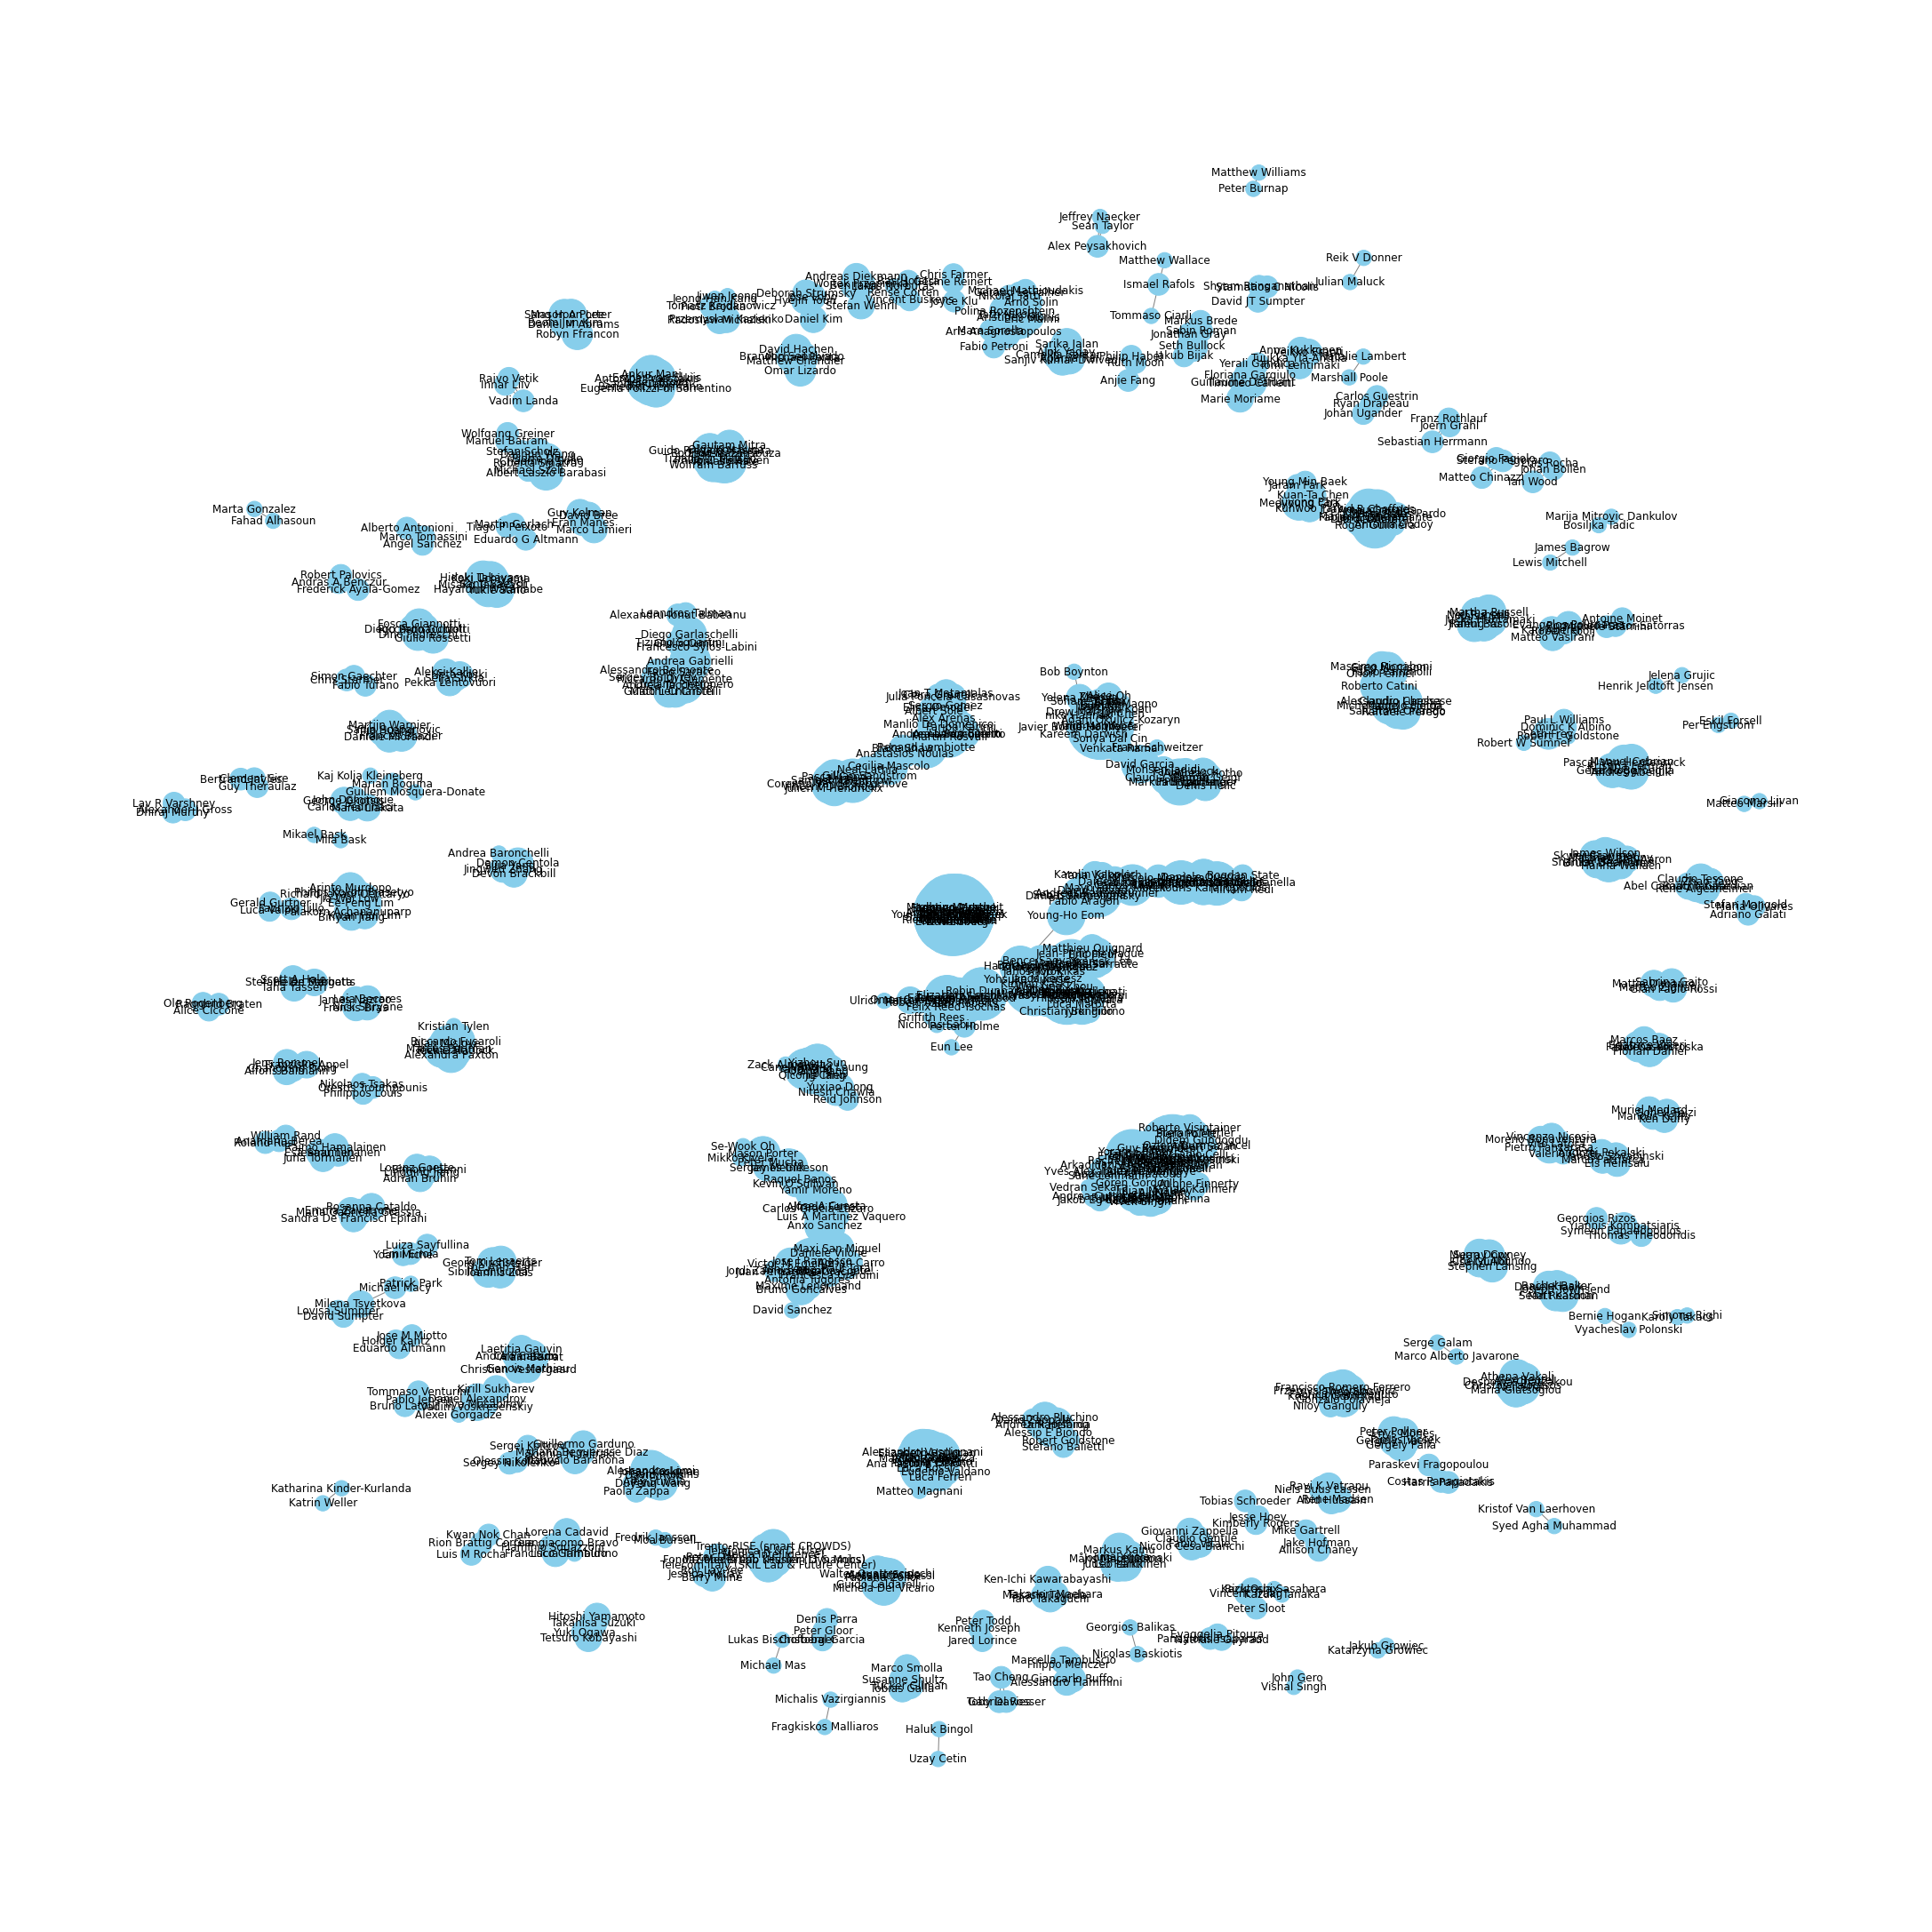

In [95]:

##################
# this is a test #
##################

import networkx as nx

# it takes ~15s per year
for year, speakers_series in df.sort_values('Year').groupby('Year')['Speakers']:
    G = nx.Graph()
    print(year)
    for speakers_line in speakers_series:
        # print(speakers_line)
        speakers = speakers_line.split(', ')
        for no, speaker in enumerate(speakers, start=1):
            # G.add_node(speaker)
            for speaker2 in speakers[no:]:
                G.add_edge(speaker, speaker2)

    node_sizes = [G.degree(n) * 300 for n in G.nodes()]
    plt.figure(figsize=(30,30))
    nx.draw(G, with_labels=True, node_size=node_sizes, node_color="skyblue", edge_color="gray", font_size=12, title=f'Speakers network in {year}')
    plt.show()
    break



In [ ]:
#
def create_graph(speakers_series: List[List[str]]):
    G = nx.Graph()
    for speakers in speakers_series:
        speakers = [s.strip() for s in speakers.split(',')]
        for no, speaker in enumerate(speakers, start=1):
            for speaker2 in speakers[no:]:
                G.add_edge(speaker, speaker2)
    return G

# def compare_graphs(G_old, G_new, year_old, year_new):
#     added_edges = set(G_new.edges()) - set(G_old.edges())
#     removed_edges = set(G_old.edges()) - set(G_new.edges())
#     all_nodes = set(G_old.nodes()).union(set(G_new.nodes()))
#
#     # Define node size by degree (importance)
#     node_sizes = {n: max(G_old.degree(n, 0), G_new.degree(n, 0)) * 300 for n in all_nodes}
#
#     # Plot graph
#     plt.figure(figsize=(5,5))
#     pos = nx.spring_layout(G_new)  # Position nodes consistently
#
#     # Draw unchanged nodes/edges
#     nx.draw(G_new, pos, with_labels=True, node_size=[node_sizes[n] for n in G_new.nodes()], node_color="skyblue", edge_color="gray", font_size=12)
#
#     # Highlight added and removed edges
#     nx.draw_networkx_edges(G_new, pos, edgelist=added_edges, edge_color="green", width=2, style="dashed")
#     nx.draw_networkx_edges(G_old, pos, edgelist=removed_edges, edge_color="red", width=2, style="dotted")
#
#     plt.title(f"Graph Changes: {year_old} ➝ {year_new}\n(Green: Added, Red: Removed)")
#     plt.show()
fig_size = 30

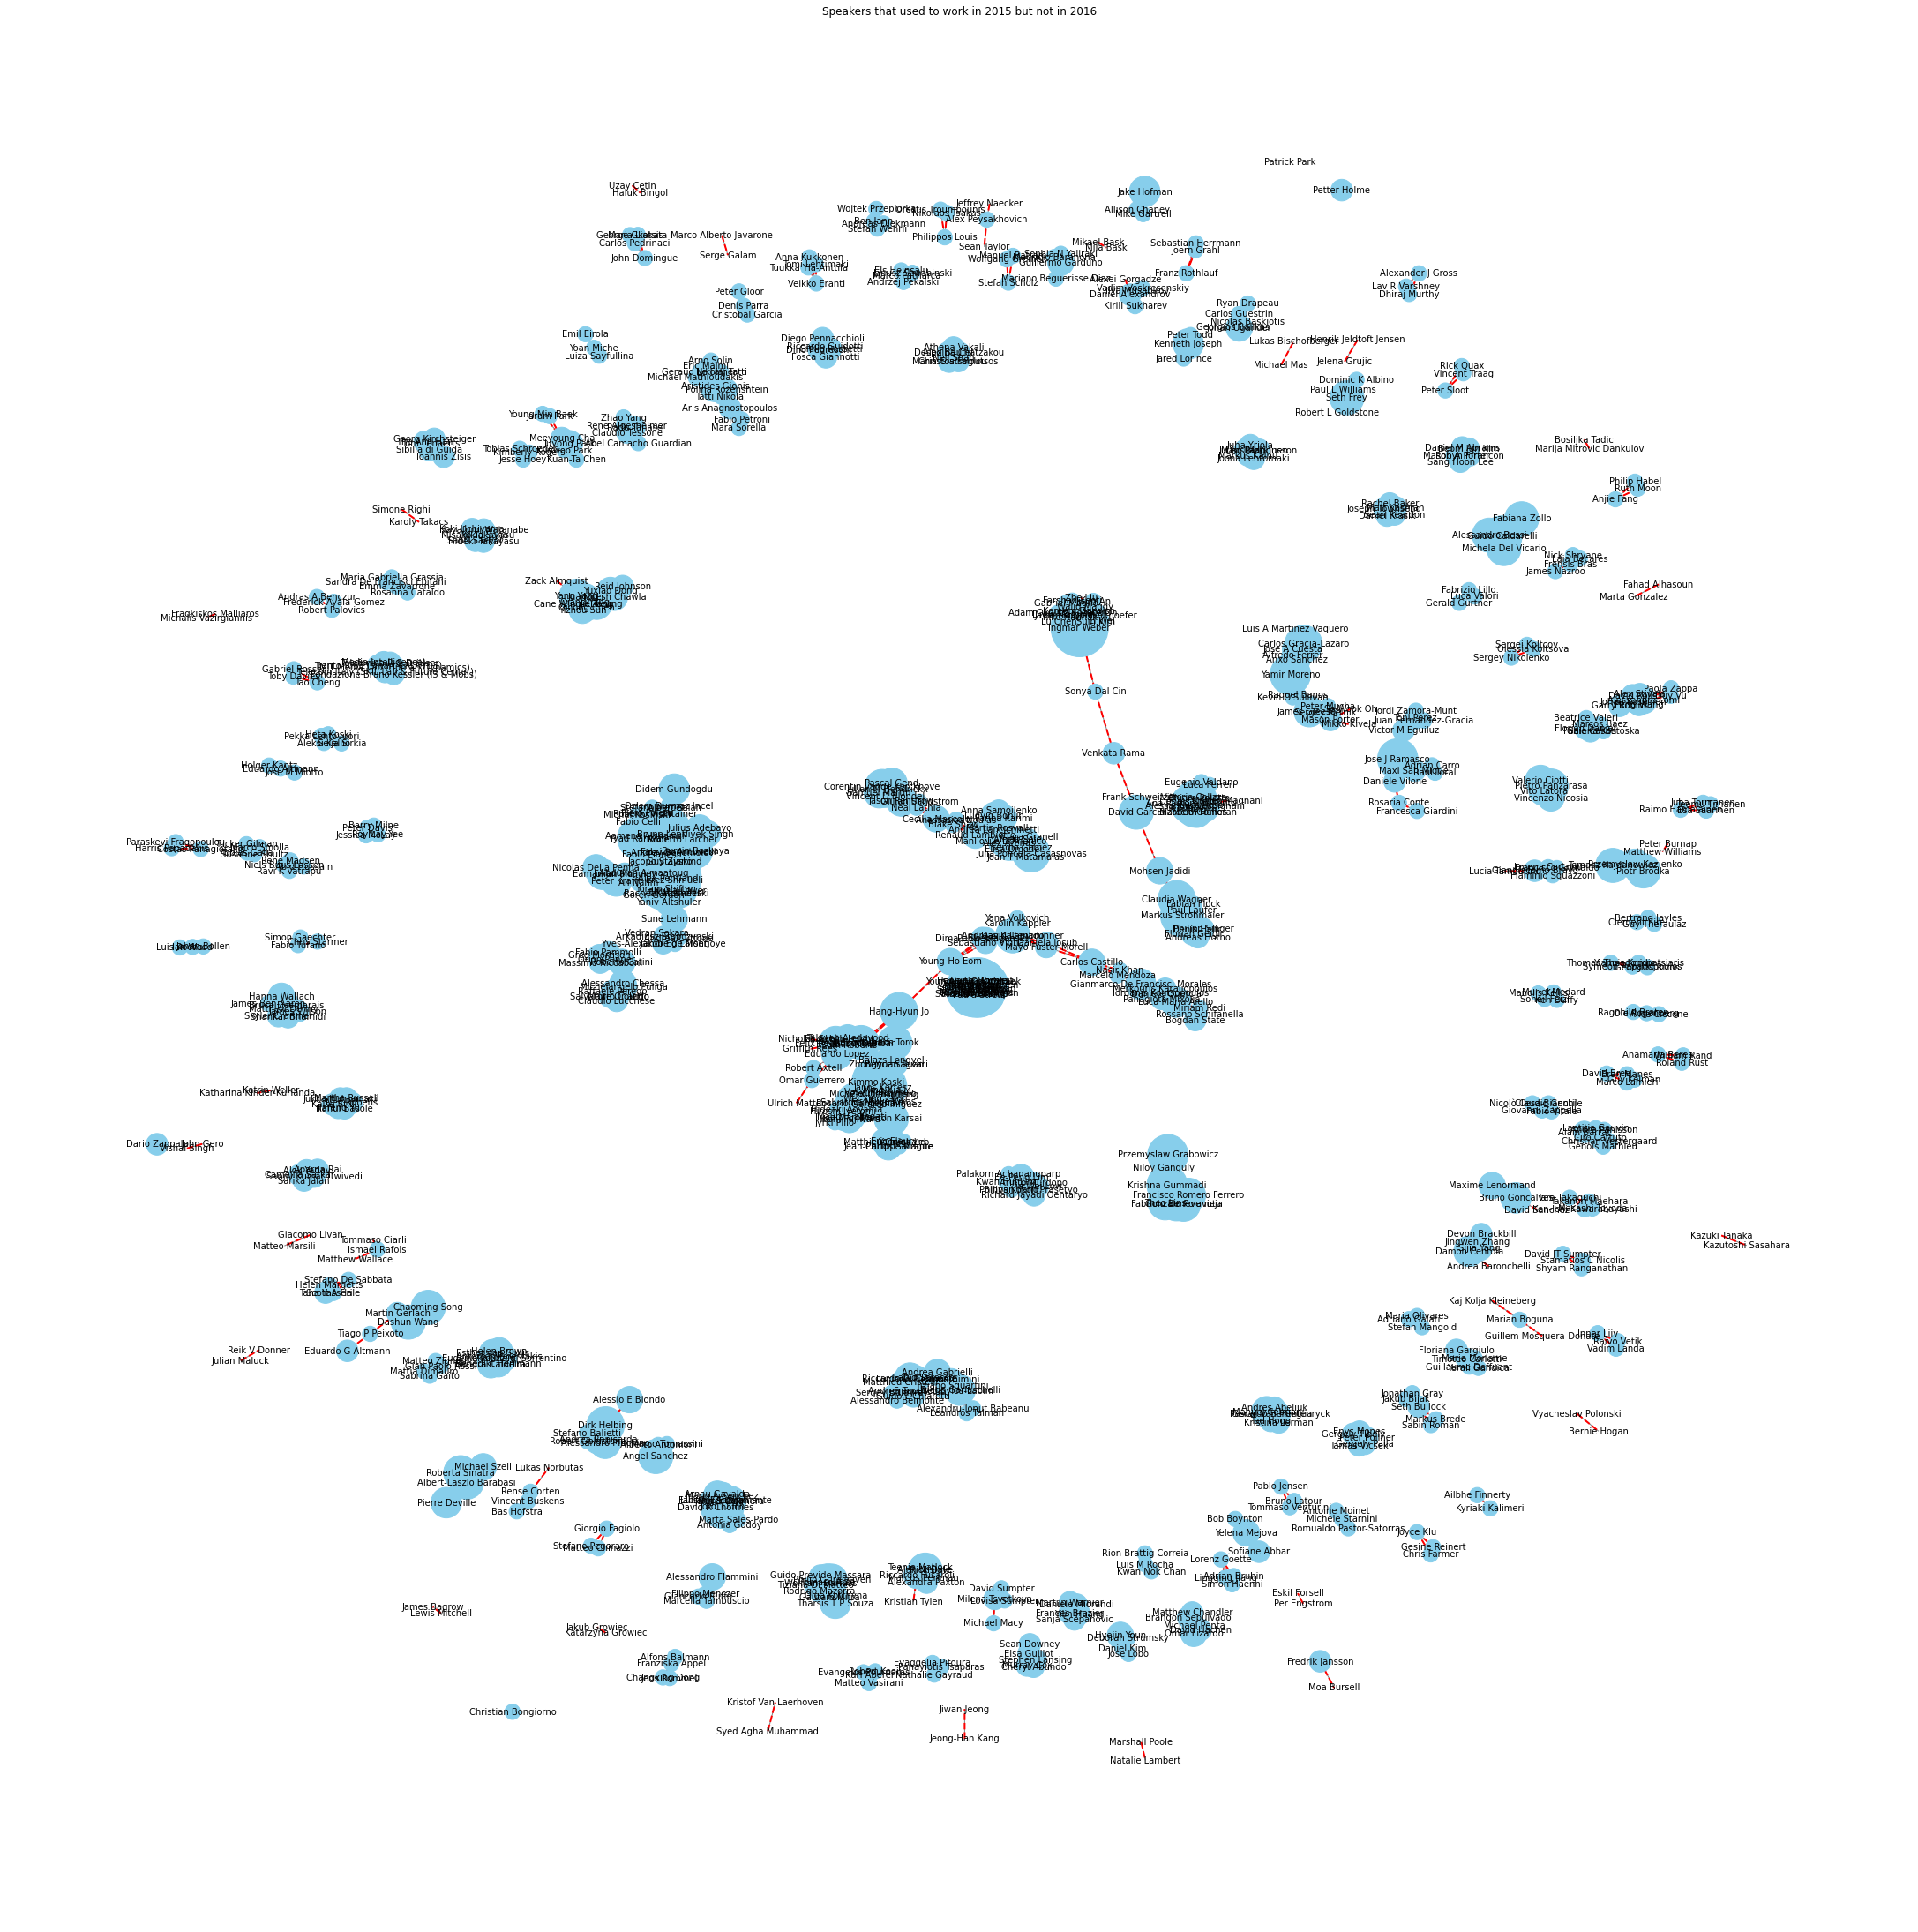

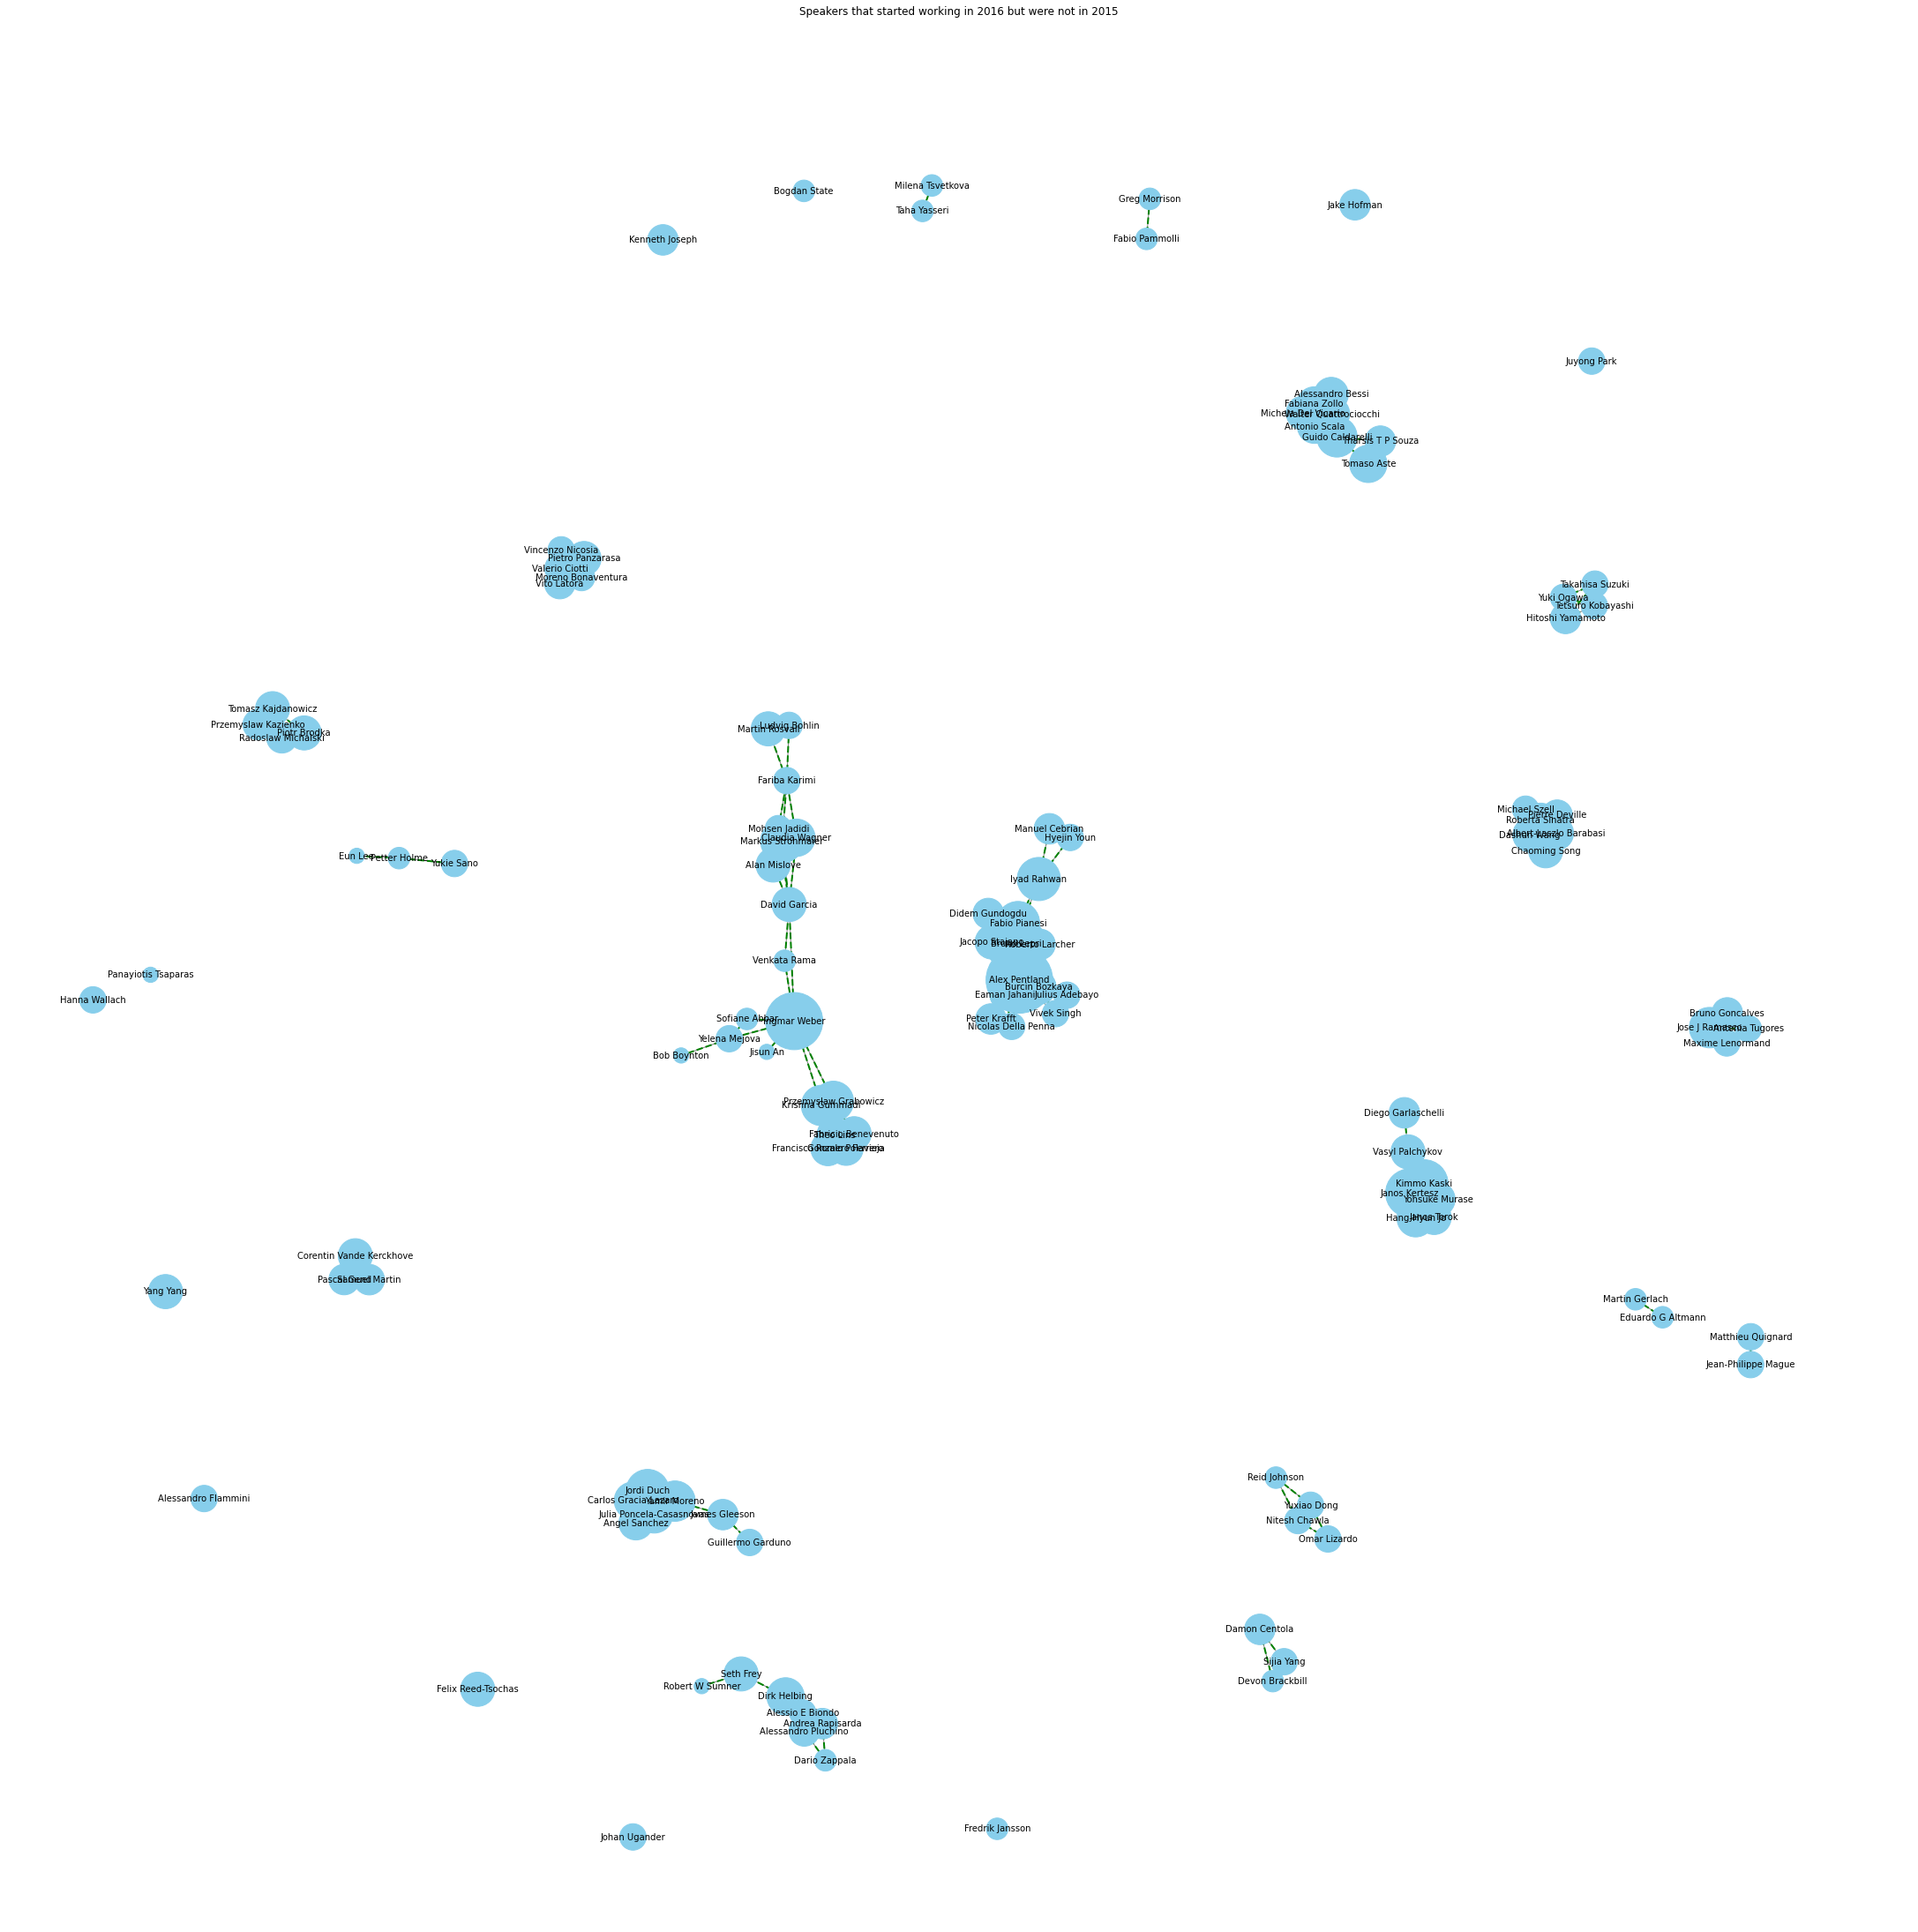

In [220]:

from itertools import chain


def removed_colaborations(G_old, G_new, year_old, year_new):
    G = nx.Graph()
    G.add_edges_from(G_old.edges())
    G.add_edges_from(G_new.edges())
    removed_edges = set(G_old.edges()) - set(G_new.edges())
    G.remove_edges_from(G.edges() - removed_edges)
    nodesToLeave = set(chain.from_iterable(removed_edges))
    G.remove_nodes_from(G.nodes() - nodesToLeave)
    # fst = list(G.edges())
    # nodes_only_in_one = set(G_old.nodes()).symmetric_difference(set(G_new.nodes()))
    # G.remove_nodes_from(nodes_only_in_one)
    # snd = list(G.edges())
    # print(f'{len(fst)=}, {len(snd)=}')
    plt.figure(figsize=(fig_size, fig_size))
    pos = nx.spring_layout(G, seed=42)  # Ensure consistent layout
    # node_sizes = {n: max(G_old.degree[n] if n in G_old else 0, G_new.degree[n] if n in G_new else 0) * 300 for n in G.nodes()}
    node_sizes = {n: ((G_old.degree[n] if n in G_old else 0) + (G_new.degree[n] if n in G_new else 0))//2 * 300 for n in G.nodes()}
    nx.draw(G, pos, with_labels=True, node_size=[node_sizes[n] for n in G.nodes()], node_color="skyblue", edge_color="gray", font_size=10)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color="red", width=2, style="dashed")
    plt.title(f"Speakers that used to work in {year_old} but not in {year_new}")
    plt.show()

def new_colaborations(G_old, G_new, year_old, year_new):
    G = nx.Graph()
    G.add_edges_from(G_old.edges())
    G.add_edges_from(G_new.edges())
    nodes_only_in_one = set(G_old.nodes()).symmetric_difference(set(G_new.nodes()))
    G.remove_nodes_from(nodes_only_in_one)
    plt.figure(figsize=(fig_size, fig_size))
    pos = nx.spring_layout(G, seed=42)  # Ensure consistent layout
    node_sizes = {n: ((G_old.degree[n] if n in G_old else 0) + (G_new.degree[n] if n in G_new else 0))//2 * 300 for n in G.nodes()}
    nx.draw(G, pos, with_labels=True, node_size=[node_sizes[n] for n in G.nodes()], node_color="skyblue", edge_color="gray", font_size=10)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color="green", width=2, style="dashed")
    plt.title(f"Speakers that started working in {year_new} but were not in {year_old}")
    plt.show()
    return

    # added_edges = set(G_new.edges()) - set(G_old.edges())
    # removed_edges = set(G_old.edges()) - set(G_new.edges())
    # all_nodes = list(set(G_old.nodes()).union(set(G_new.nodes())))
    # removed_nodes = set(G_old.nodes()) - set(G_new.nodes())
    # G_new.remove_nodes_from(G_old.nodes() - G_new.nodes())
    # G_old.add_nodes_from(removed_nodes)
    #
    # # node_sizes = {n: max(G_old.degree(n, 0), G_new.degree(n, 0)) * 300 for n in all_nodes}
    # node_sizes = {n: (max(G_old.degree[n] if n in G_old else 0, G_new.degree[n] if n in G_new else 0) * 300) + 1 for n in all_nodes}
    #
    # plt.figure(figsize=(fig_size, fig_size))
    # pos = nx.spring_layout(G_new, seed=42)  # Ensure consistent layout
    #
    # # print(f'node_sizes: {node_sizes}')
    # # print(f'G_new.nodes(): {G_new.nodes()}')
    # nx.draw(G_new, pos, with_labels=True, node_size=[node_sizes[n] for n in G_new.nodes()], node_color="skyblue", edge_color="gray", font_size=10)
    #
    # nx.draw_networkx_edges(G_new, pos, edgelist=added_edges, edge_color="green", width=2, style="dashed")
    # nx.draw_networkx_edges(G_old, pos, edgelist=removed_edges, edge_color="red", width=2, style="dotted")
    #
    # plt.title(f"Graph Changes: {year_old} -> {year_new}\n(Green: Added, Red: Removed)")
    # plt.show()


sorted_years = df.sort_values('Year').groupby('Year')['Speakers']


prev_year, prev_speakers_series = None, None
for year, speakers_series in sorted_years:
    if prev_year is None:
        g = create_graph(speakers_series)
        node_sizes = [g.degree(n) * 300 for n in g.nodes()]
        plt.figure(figsize=(fig_size, fig_size))
        plt.title(f'Speakers network in {year}')
        nx.draw(g, with_labels=True, node_size=node_sizes, node_color="skyblue", edge_color="gray", font_size=12)
    else:
        G_old = create_graph(prev_speakers_series)
        G_new = create_graph(speakers_series)
        removed_colaborations(G_old, G_new, prev_year, year)
        new_colaborations(G_old, G_new, prev_year, year)
        # break
    prev_year = year
    prev_speakers_series = speakers_series